In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np

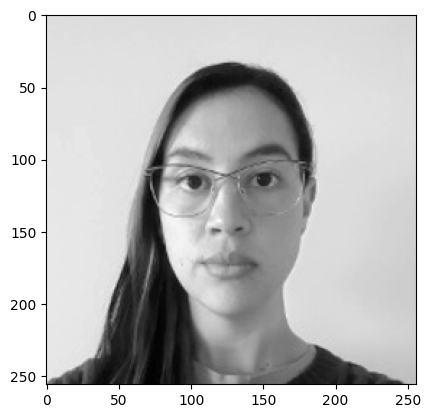

In [4]:
# Open the image
my_image = Image.open("cohort_face_photos/Imagen23.jpg")

# Convert to grayscale and resize
my_image = my_image.convert("L")
my_image = my_image.resize((256, 256))

# Plot the image
plt.imshow(my_image, cmap="gray")
plt.show()

To be able to calculate the average face of the cohort, some preprocessing was required. 

The photos were cropped in ways that could line up more or less well. This was necessary since we are not implementing methods to recognize faces that allow us to align them

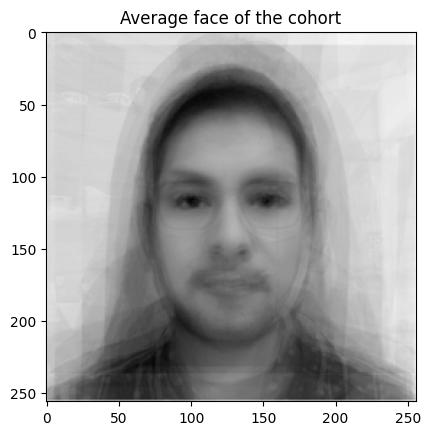

In [7]:
# Load all face images
face_images = []
for file_name in os.listdir('cohort_face_photos/'):
    if file_name.endswith('.jpg'):
        image = Image.open(os.path.join('cohort_face_photos', file_name))
        # Convert to grayscale and resize to 256x256
        image = image.convert('L').resize((256, 256))
        face_images.append(np.array(image).flatten())

face_array = np.vstack(face_images)

# Calculate the mean of the 3D array
average_face = np.mean(face_array, axis=0)

# Convert the average face back to a 2D array and then back to an image
average_face_image = Image.fromarray(average_face.reshape((256, 256)).astype(np.uint8))

# Display the average face
plt.imshow(average_face_image, cmap="gray")
plt.title('Average face of the cohort')
plt.show()


To measure how distant is my face from the average, the difference between each pixel in my image and each pixel in the average was calculated. 
After that, the results were escalated so they could be between 0 and 1 to improve the visualization 

It can be noticed that half of my face is really similar to the cohort average, while the other half shows the greatest differences. 

It can be possible that my face is very asymmetric or the cohort's face is very asymmetric.

In [10]:
diference_face = np.array(my_image).flatten() - average_face
diference_face_image = diference_face.reshape((256, 256)).astype(np.uint8)
diference_face_img_escalated = diference_face_image/(max(diference_face)-min(diference_face))

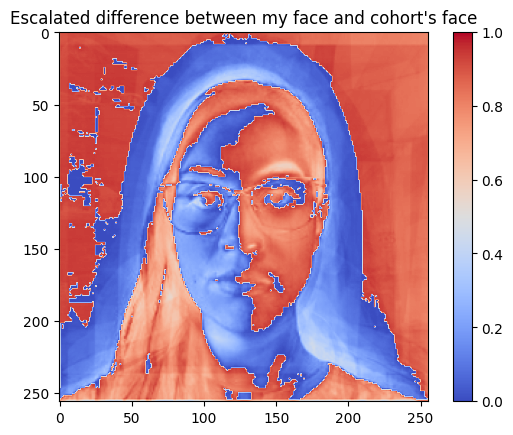

In [12]:
# Plot the image
plt.imshow(diference_face_img_escalated,cmap = 'coolwarm',vmin=0,vmax=1)
plt.colorbar()
plt.title("Escalated difference between my face and cohort's face")
plt.show()
